#Naive Bayes from scratch

In [38]:
#loading the data

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import math
iris = sns.load_dataset('iris')

iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Visualize the data
 

In [34]:
#Shuffle the data for more generic visualization
iris=iris.sample(frac=1).reset_index(drop=True)

Text(0.5, 1.0, 'Effect of petal_width')

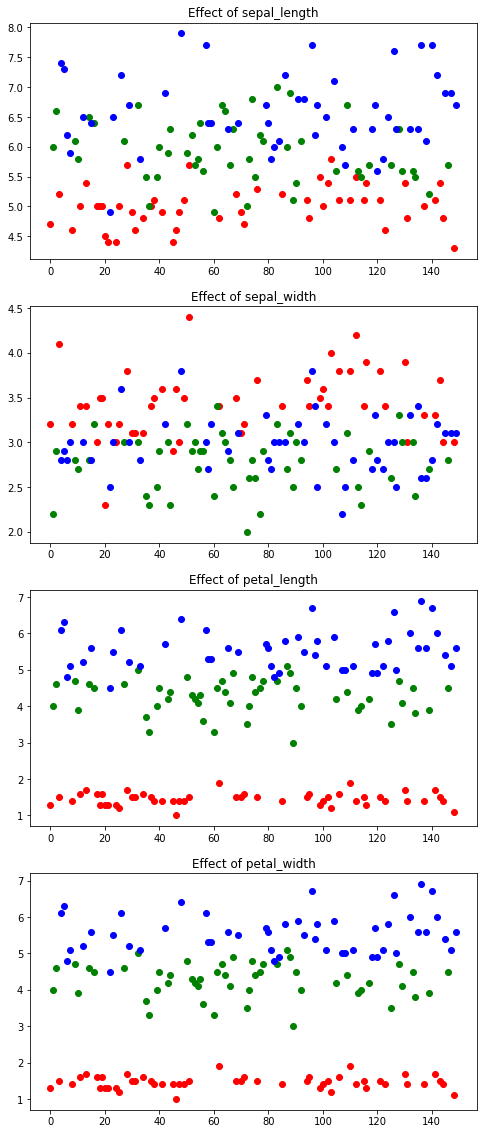

In [35]:
#Lets see the effect of each feature by visualizing it

fig, (ax1, ax2,ax3,ax4) = plt.subplots(4,figsize=(8,20))
ax1.scatter(x=iris[iris.species=='setosa']['sepal_length'].index, y=iris[iris.species=='setosa']['sepal_length'].values, 
                                                    color='red', label='setosa')
ax1.scatter(x=iris[iris.species=='versicolor']['sepal_length'].index, y=iris[iris.species=='versicolor']['sepal_length'].values, 
                                                color='green', label='versicolor')
ax1.scatter(x=iris[iris.species=='virginica']['sepal_length'].index, y=iris[iris.species=='virginica']['sepal_length'].values, 
                                                color='blue', label='virginica')



ax2.scatter(x=iris[iris.species=='setosa']['sepal_width'].index, y=iris[iris.species=='setosa']['sepal_width'].values, 
                                                    color='red', label='setosa')
ax2.scatter(x=iris[iris.species=='versicolor']['sepal_width'].index, y=iris[iris.species=='versicolor']['sepal_width'].values, 
                                                color='green', label='versicolor')
ax2.scatter(x=iris[iris.species=='virginica']['sepal_width'].index, y=iris[iris.species=='virginica']['sepal_width'].values, 
                                                color='blue', label='virginica')


ax3.scatter(x=iris[iris.species=='setosa']['petal_length'].index, y=iris[iris.species=='setosa']['petal_length'].values, 
                                                    color='red', label='setosa')
ax3.scatter(x=iris[iris.species=='versicolor']['petal_length'].index, y=iris[iris.species=='versicolor']['petal_length'].values, 
                                                color='green', label='versicolor')
ax3.scatter(x=iris[iris.species=='virginica']['petal_length'].index, y=iris[iris.species=='virginica']['petal_length'].values, 
                                                color='blue', label='virginica')



ax4.scatter(x=iris[iris.species=='setosa']['petal_width'].index, y=iris[iris.species=='setosa']['petal_length'].values, 
                                                    color='red', label='setosa')
ax4.scatter(x=iris[iris.species=='versicolor']['petal_width'].index, y=iris[iris.species=='versicolor']['petal_length'].values, 
                                                color='green', label='versicolor')
ax4.scatter(x=iris[iris.species=='virginica']['petal_width'].index, y=iris[iris.species=='virginica']['petal_length'].values, 
                                                color='blue', label='virginica')

ax1.set_title('Effect of sepal_length')
ax2.set_title('Effect of sepal_width')
ax3.set_title('Effect of petal_length')
ax4.set_title('Effect of petal_width')


By above visualiztion it is clear that 'petal-length' and 'petal width' are important features.

Here our goal is to understand the algorithm so we will take all the features.

In [51]:
# Splitting the dataset into training and test dataset

grps=iris.groupby('species')
train=pd.DataFrame()
test=pd.DataFrame()

for group,i in grps:
  train=train.append(i[:-10],ignore_index=True)
  test=test.append(i[-10:],ignore_index=True)

**The formulae for bayes theorem :**

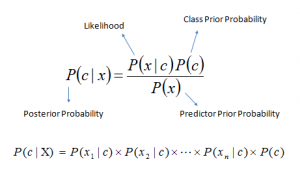

P(c|x) = Probability of class given parameters x1,x2,x3,x4. We aim to calculate this

p(c) = Probability of class. Now the dataset is distributed equally among all the classes. So this value will be constant.

p(x) = Probability of parameter/feature. As we are considering all the features as independent. This value is constant too 

**So the above Naive bayes formulae can be modified for our problem as** - 



*P(c|x) = P(x|c) x Constant* 



Now we have 4 parameters 


*P(x|c) = P(x1|c) x P(x2|c) x P(x3|c) x P (x4|c)*


**To estimate these probabilities lets check the distributions of classes**


Text(0.5, 1.0, 'petal_length')

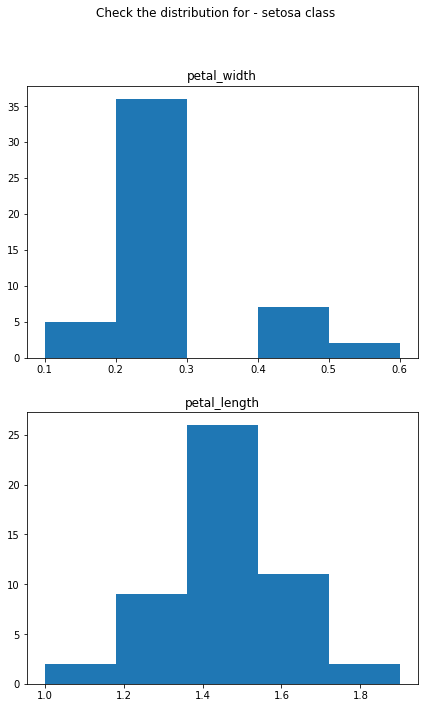

In [42]:
# Distribution for setosa class
# As we saw petal length and petal width are important features so we wil check the distribution of those features only

fig, (ax1, ax2) = plt.subplots(2,figsize=(7,11))
fig.suptitle('Check the distribution for - setosa class')
x = iris[iris['species']=='setosa']
ax1.hist(x['petal_width'], bins = 5)
ax2.hist(x['petal_length'], bins = 5)
ax1.set_title('petal_width')
ax2.set_title('petal_length')

The satosa class can be consider as normally distributed 

Text(0.5, 1.0, 'petal_length')

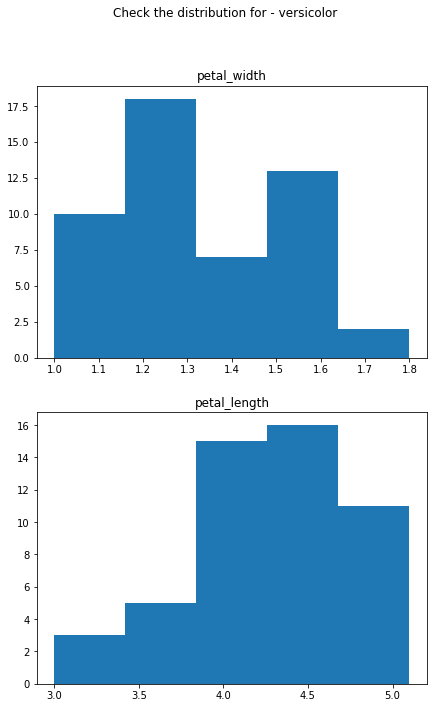

In [43]:
#Distribution for versicolor class
fig, (ax1, ax2) = plt.subplots(2,figsize=(7,11))
fig.suptitle('Check the distribution for - versicolor')
x = iris[iris['species']=='versicolor']
ax1.hist(x['petal_width'], bins = 5)
ax2.hist(x['petal_length'], bins = 5)
ax1.set_title('petal_width')
ax2.set_title('petal_length')



Text(0.5, 1.0, 'petal_length')

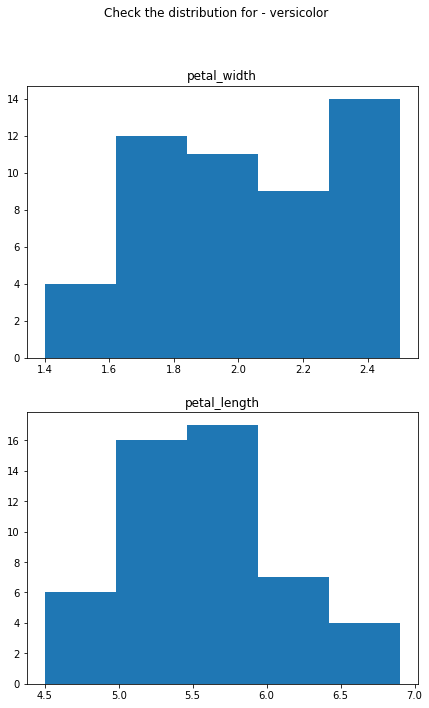

In [49]:
#Distribution for virginica class
fig, (ax1, ax2) = plt.subplots(2,figsize=(7,11))
fig.suptitle('Check the distribution for - versicolor')
x = iris[iris['species']=='virginica']
ax1.hist(x['petal_width'], bins = 5)
ax2.hist(x['petal_length'], bins = 5)
ax1.set_title('petal_width')
ax2.set_title('petal_length')

Excluding few cases we can assume that plots are normally distributed

**Calculating probability from normal distribution**

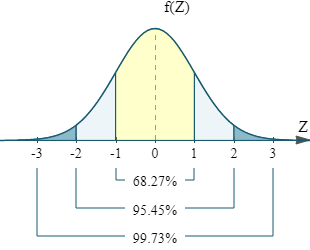

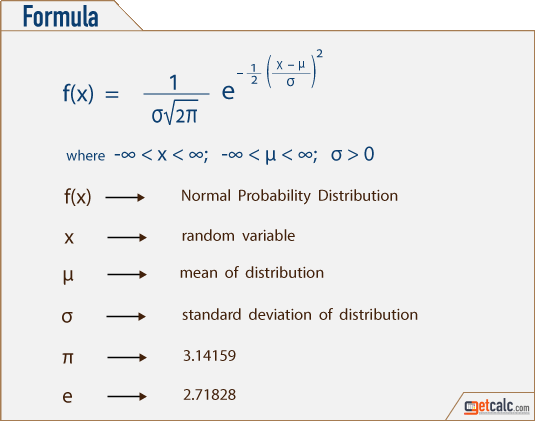

In [52]:
# From above diagram it is clear that for calculating probability we need to know mean and
# std of distribution.
# Here we calculated both

k=iris.groupby('species')
a=[]
b=[]
for g,i in k:
  a.append(i.mean())
  b.append(i.std())

  

Just to remind we aim to calculate

*P(x|c) = P(x1|c) x P(x2|c) x P(x3|c) x P (x4|c)*

above value.

Now we know that, from the distribution we can calculate 
==> P(x1|c) x P(x2|c) x P(x3|c) x P (x4|c)  for given class.


In below function we will find the class which has max p(c|x) value. 

In [53]:
cl=['setosa','versicolor','virginica']

In [54]:
def nb(a,b,x,cl):
  df=pd.DataFrame()
  k=[]
  for i in range(len(a)):
    df['sepal_length']=np.exp(((x['sepal_length']-a[i][0])**2)*-0.5)/(b[i][0]*math.sqrt(2*math.pi))
    df['sepal_width']=np.exp(((x['sepal_width']-a[i][1])**2)*-0.5)/(b[i][1]*math.sqrt(2*math.pi))
    df['petal_length']=np.exp(((x['petal_length']-a[i][2])**2)*-0.5)/(b[i][2]*math.sqrt(2*math.pi))
    df['petal_width']=np.exp(((x['petal_width']-a[i][3])**2)*-0.5)/(b[i][3]*math.sqrt(2*math.pi))
    tmp=df['sepal_length']*df['sepal_width']*df['petal_length']*df['petal_width']
    k.append(tmp)
  dff=pd.concat(k,axis=1)
  dff.columns=cl
  dff['res']=dff.eq(dff.max(1), axis=0).dot(dff.columns)

  return dff['res']

In [55]:
#Calculating the overall efficiency

tmp=nb(a,b,iris,cl)==iris['species']
acc=tmp.value_counts()[True]/len(iris)

print ('accuracy on overall data is = {}%'.format(acc*100))

accuracy on overall data is = 86.66666666666667%


# Using Sci-kit learn library

In [56]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(iris[['sepal_length','sepal_width','petal_length','petal_width']], iris['species'])
clf.score(iris[['sepal_length','sepal_width','petal_length','petal_width']],iris['species'])


0.96